# Uppgift 0 - uppvärmning med riket

 a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_engelska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Engelska", skiprows=7)
df_matematik = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=7
)
df_svenska = pd.read_excel("riket20<23_åk9_np.xlsx", sheet_name="Svenska", skiprows=7)
df_svenska2 = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", skiprows=7
)
df_rapport = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Rapportbeskrivning och def."
)

df_matematik

OSError: [Errno 22] Invalid argument: 'riket20<23_åk9_np.xlsx'

 b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

 diskussion 

In [ ]:
import pandas as pd

df_matematik = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=8
)

df_matematik = df_matematik.iloc[:, 1:-3]

df_matematik.columns = [
    "Huvudman",
    "Totalt A-F",
    "Flickor A-F",
    "Pojkar A-F",
    "Totalt i % A-E",
    "Flickor i % A-E",
    "Pojkar i % A-E",
]

df_matematik

,Huvudman,Totalt A-F,Flickor A-F,Pojkar A-F,Totalt i % A-E,Flickor i % A-E,Pojkar i % A-E
0,Samtliga,106766,51548,55218,89.1,88.7,89.5
1,Kommunal,84163,40386,43777,88.1,87.7,88.5
2,Enskild,22553,11137,11416,92.9,92.2,93.5
3,Skolverket,50,25,25,~100,~100,~100


Pojkar i % A-E X 2 VAR PROBLEMET

In [ ]:
import pandas as pd

# Read the Excel file
df_matematik = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=8
)

# Select relevant columns
df_matematik = df_matematik.iloc[:, 1:-3]

# Rename columns
df_matematik.columns = [
    "Huvudman",
    "Totalt A-F",
    "Flickor A-F",
    "Pojkar A-F",
    "Totalt i % A-E",
    "Flickor i % A-E",
    "Pojkar i % A-E",
]

# Convert relevant columns to numeric types
df_matematik["Flickor A-F"] = pd.to_numeric(df_matematik["Flickor A-F"], errors="coerce")
df_matematik["Pojkar A-F"] = pd.to_numeric(df_matematik["Pojkar A-F"], errors="coerce")
df_matematik["Flickor i % A-E"] = pd.to_numeric(df_matematik["Flickor i % A-E"], errors="coerce")
df_matematik["Pojkar i % A-E"] = pd.to_numeric(df_matematik["Pojkar i % A-E"], errors="coerce")

# Calculate the number of girls and boys with grade F
girls_f = round(
    df_matematik.loc[0, "Flickor A-F"]
    - df_matematik.loc[0, "Flickor A-F"]
    * (df_matematik.loc[0, "Flickor i % A-E"] / 100),
    2,
)

boys_f = round(
    df_matematik.loc[0, "Pojkar A-F"]
    - df_matematik.loc[0, "Pojkar A-F"] * (df_matematik.loc[0, "Pojkar i % A-E"] / 100),
    2,
)

# Display the results
print("Antal flickor med betyg F för samtliga:", girls_f)
print("Antal pojkar med betyg F för samtliga:", boys_f)


'Antal flickor med betyg F för samtliga:'

5824.92

'Antal pojkar med betyg F för samtliga:'

5797.89

  D) Rita ett stapeldiagram på totala poängen för de olika ämnena.

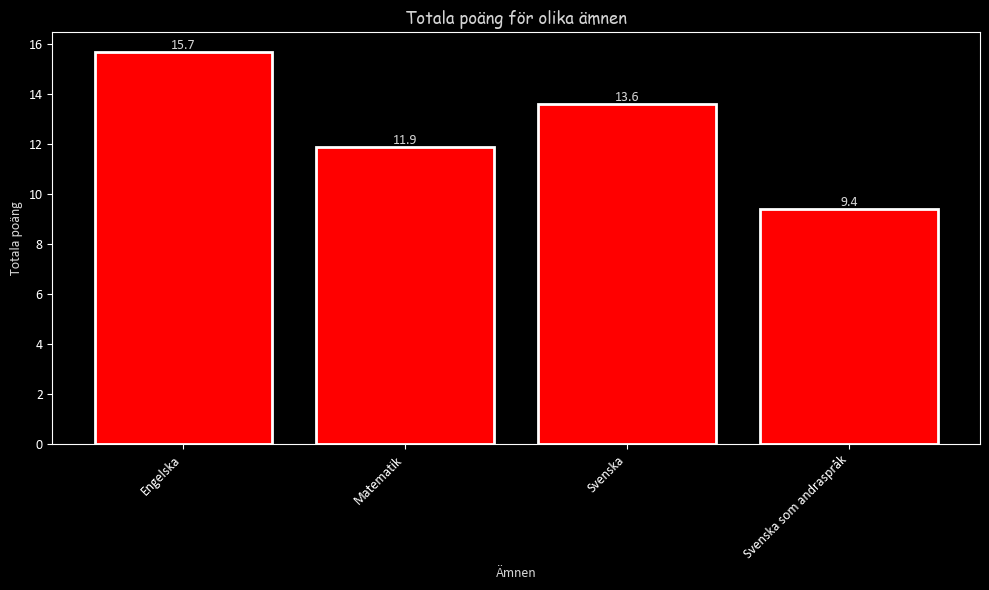

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

total_points = {
    "Engelska": 15.7,
    "Matematik": 11.9,
    "Svenska": 13.6,
    "Svenska som andraspråk": 9.4
}

plt.figure(figsize=(10, 6))
bars = plt.bar(total_points.keys(), total_points.values(), color="red", edgecolor="white", linewidth=2)

plt.title("Totala poäng för olika ämnen", color='lightgray', fontname="Comic Sans MS")
plt.xlabel("Ämnen", color='lightgray')
plt.ylabel("Totala poäng", color='lightgray')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height}", ha="center", va="bottom", color='lightgray')

plt.show()


Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

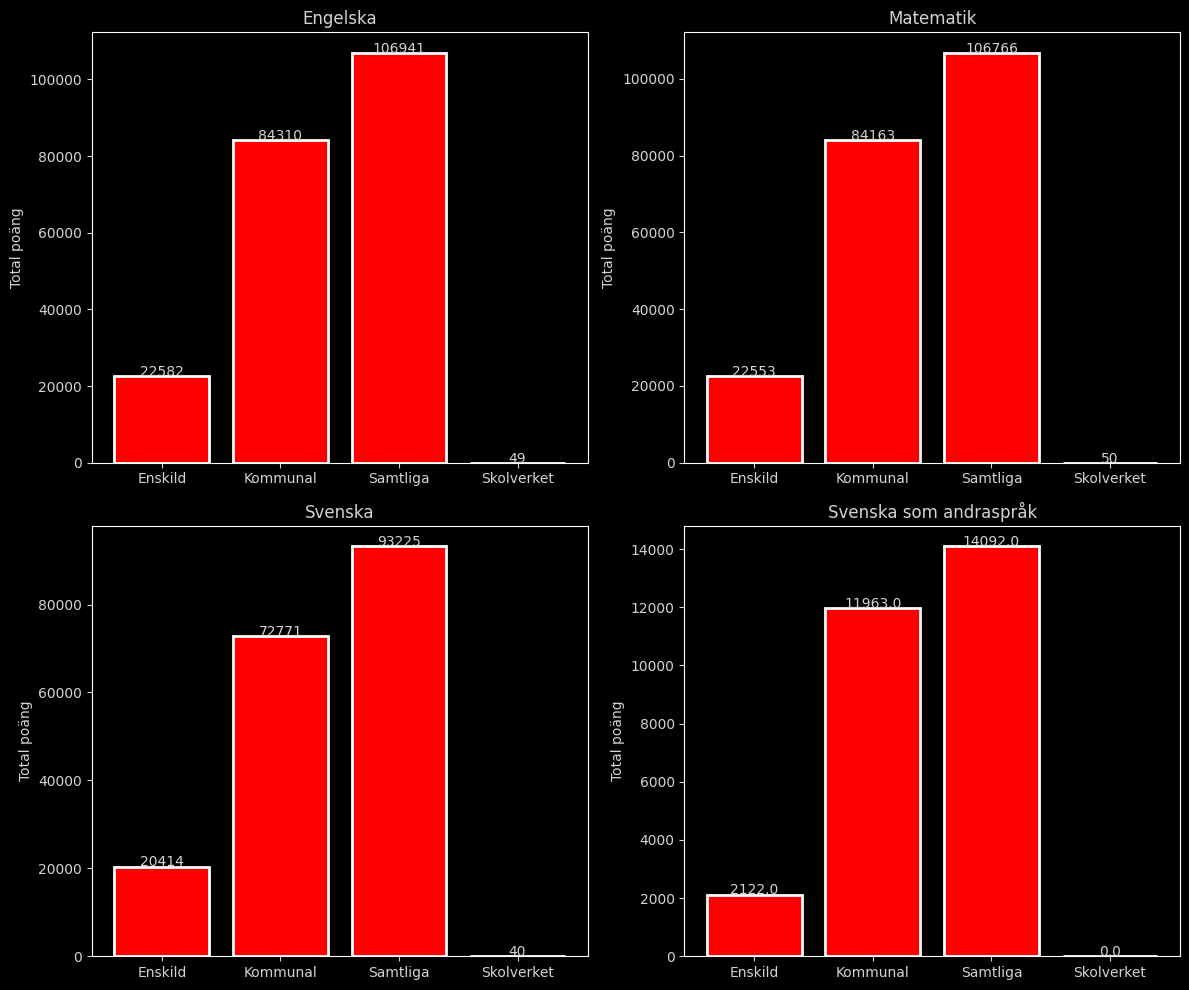

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df_engelska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Engelska", header=8)
df_matematik = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Matematik", header=8)
df_svenska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Svenska", header=8)
df_svenska_som_andrasprak = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", header=8
)

df_engelska["Totalt"] = pd.to_numeric(df_engelska["Totalt"], errors="coerce")
df_matematik["Totalt"] = pd.to_numeric(df_matematik["Totalt"], errors="coerce")
df_svenska["Totalt"] = pd.to_numeric(df_svenska["Totalt"], errors="coerce")
df_svenska_som_andrasprak["Totalt"] = pd.to_numeric(
    df_svenska_som_andrasprak["Totalt"], errors="coerce"
)

total_engelska = df_engelska.groupby("Typ av huvudman")["Totalt"].sum()
total_matematik = df_matematik.groupby("Typ av huvudman")["Totalt"].sum()
total_svenska = df_svenska.groupby("Typ av huvudman")["Totalt"].sum()
total_svenska_som_andrasprak = df_svenska_som_andrasprak.groupby("Typ av huvudman")[
    "Totalt"
].sum()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, total, subject in zip(axs.flat, [total_engelska, total_matematik, total_svenska, total_svenska_som_andrasprak], 
                               ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]):
    ax.bar(total.index, total, color="red", edgecolor="white", linewidth=2)
    ax.set_title(subject, color='lightgray')
    ax.set_ylabel("Total poäng", color='lightgray')
    ax.tick_params(axis='x', colors='lightgray')
    ax.tick_params(axis='y', colors='lightgray')
    for i, v in enumerate(total):
        ax.text(i, v + 10, str(v), ha="center", color='lightgray')

plt.tight_layout()

plt.show()


a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


In [ ]:
import pandas as pd

# Läs in data från båda tabellerna
df_1a = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")
df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

data_1a = df_1a.iloc[9:14]
data_1b = df_1b.iloc[7:12]

a_columns = [
    "Läsår",
    "Avslut åk 9 Totalt",
    "Flickor avslut",
    "Pojkar avslut",
    "Elever med slutbetyg totalt",
    "Flickor slutbetyg",
    "Pojkar slutbetyg",
    "Godkända slutbetyg totalt",
    "Flickor godkända",
    "Pojkar godkända",
]

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämne flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1a.columns = a_columns
data_1b.columns = b_columns

display(data_1a)
display(data_1b)

,Läsår,Avslut åk 9 Totalt,Flickor avslut,Pojkar avslut,Elever med slutbetyg totalt,Flickor slutbetyg,Pojkar slutbetyg,Godkända slutbetyg totalt,Flickor godkända,Pojkar godkända
9,2018/19,112731,54667,58064,112280,54430,57850,110663,53757,56906
10,2019/20,115023,55670,59353,114444,55389,59055,112728,54711,58017
11,2020/21,116359,56715,59644,115710,56394,59316,114136,55721,58415
12,2021/22,120525,58513,62012,119891,58207,61684,117935,57312,60623
13,2022/23,121369,59043,62326,120742,58703,62039,118736,57781,60955


,Läsår,Medelvärde 16 ämnen totalt,Medelvärde 16 ämne flickor,Medelvärde 16 ämnen pojkar,Medelvärde 17 ämnen totalt,Medelvärde 17 flickor,Medelvärde 17 pojkar,% Som saknar godkänt,P Flickor,P Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


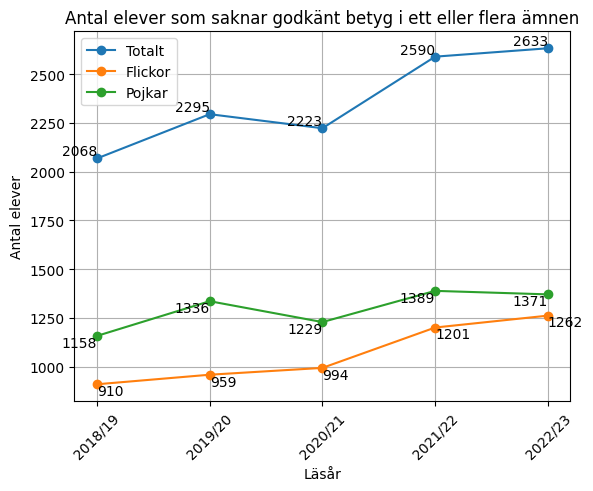

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_1a = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")

data_1a = df_1a.iloc[9:14].copy()

a_columns = [
    "Läsår",
    "Avslut åk 9 Totalt",
    "Flickor avslut",
    "Pojkar avslut",
    "Elever med slutbetyg totalt",
    "Flickor slutbetyg",
    "Pojkar slutbetyg",
    "Godkända slutbetyg totalt",
    "Flickor godkända",
    "Pojkar godkända",
]

data_1a.columns = a_columns

data_1a["Elever saknar godkänt betyg, totalt"] = (
    data_1a["Avslut åk 9 Totalt"] - data_1a["Godkända slutbetyg totalt"]
)
data_1a["Elever saknar godkänt betyg, flickor"] = (
    data_1a["Flickor avslut"] - data_1a["Flickor godkända"]
)
data_1a["Elever saknar godkänt betyg, pojkar"] = (
    data_1a["Pojkar avslut"] - data_1a["Pojkar godkända"]
)

plt.plot(
    data_1a["Läsår"],
    data_1a["Elever saknar godkänt betyg, totalt"],
    marker="o",
    label="Totalt",
)
plt.plot(
    data_1a["Läsår"],
    data_1a["Elever saknar godkänt betyg, flickor"],
    marker="o",
    label="Flickor",
)
plt.plot(
    data_1a["Läsår"],
    data_1a["Elever saknar godkänt betyg, pojkar"],
    marker="o",
    label="Pojkar",
)

# Add numbers on each point
for i, txt in enumerate(data_1a["Elever saknar godkänt betyg, totalt"]):
    plt.text(
        data_1a["Läsår"].iloc[i],
        data_1a["Elever saknar godkänt betyg, totalt"].iloc[i],
        txt,
        ha="right",
        va="bottom",
    )

for i, txt in enumerate(data_1a["Elever saknar godkänt betyg, flickor"]):
    plt.text(
        data_1a["Läsår"].iloc[i],
        data_1a["Elever saknar godkänt betyg, flickor"].iloc[i],
        txt,
        ha="left",
        va="top",
    )

for i, txt in enumerate(data_1a["Elever saknar godkänt betyg, pojkar"]):
    plt.text(
        data_1a["Läsår"].iloc[i],
        data_1a["Elever saknar godkänt betyg, pojkar"].iloc[i],
        txt,
        ha="right",
        va="top",
    )

plt.title("Antal elever som saknar godkänt betyg i ett eller flera ämnen")
plt.xlabel("Läsår")
plt.ylabel("Antal elever")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

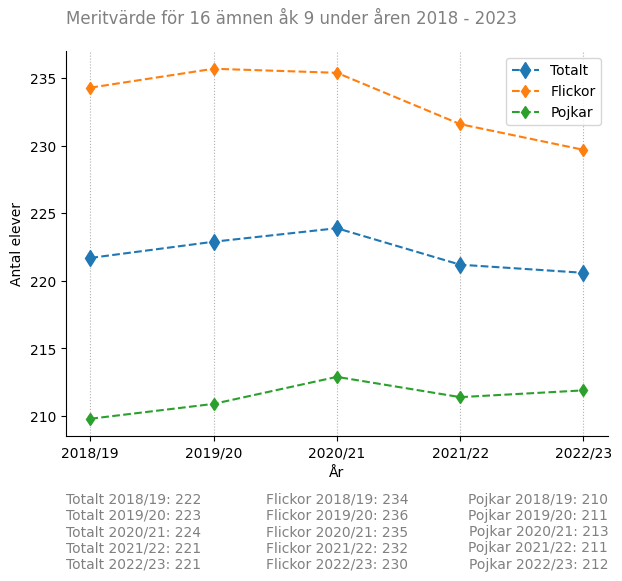

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

data_1b = df_1b.iloc[7:13].copy()

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämnen flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1b.columns = b_columns

data_1b.dropna(inplace=True)

# Extracting data
years = data_1b["Läsår"]
Mean_T = data_1b["Medelvärde 16 ämnen totalt"]
Mean_F = data_1b["Medelvärde 16 ämnen flickor"]
Mean_P = data_1b["Medelvärde 16 ämnen pojkar"]

# Plotting
fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(years, Mean_T, label="Totalt", marker="d", ms=8, ls="--")
plt.plot(years, Mean_F, label="Flickor", marker="d", ls="--")
plt.plot(years, Mean_P, label="Pojkar", marker="d", ls="--")

plt.title(
    "Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023",
    pad=20,
    color="gray",
    loc="left",
)

plt.xlabel("År")
plt.ylabel("Antal elever")

plt.grid(axis="x", ls=":", linewidth=0.8)
plt.legend()

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add mean values as text
text_total = [
    f'Totalt {year}: {round(val)}'
    for val, year in zip(Mean_T, years)
]
text_female = [
    f'Flickor {year}: {round(val)}'
    for val, year in zip(Mean_F, years)
]
text_male = [
    f'Pojkar {year}: {round(val)}'
    for val, year in zip(Mean_P, years)
]

plt.text(
    0.0,
    -0.35,
    "\n".join(text_total),
    transform=plt.gca().transAxes,
    ha="left",
    va="bottom",
    color="gray",
)
plt.text(
    0.5,
    -0.35,
    "\n".join(text_female),
    transform=plt.gca().transAxes,
    ha="center",
    va="bottom",
    color="gray",
)
plt.text(
    1.0,
    -0.35,
    "\n".join(text_male),
    transform=plt.gca().transAxes,
    ha="right",
    va="bottom",
    color="gray",
)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df_engelska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Engelska", skiprows=7)
df_matematik = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=7)
df_svenska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Svenska", skiprows=7)
df_svenska_som_andrasprak = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", skiprows=7
)

total_engelska = df_engelska.iloc[1, 2]  # Row 1, column 2
total_matematik = df_matematik.iloc[1, 2]
total_svenska = df_svenska.iloc[1, 2]
total_svenska2 = df_svenska_som_andrasprak.iloc[1, 2]

labels = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
totals = [total_engelska, total_matematik, total_svenska, total_svenska2]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, totals, color="red", edgecolor="white", linewidth=2)
plt.title("Antal elever med provbetyg A-F för varje ämne", color='lightgray', fontname = "Comic Sans MS")
plt.xlabel("Ämnen", color='lightgray')
plt.ylabel("Antal elever med provbetyg A-F", color='lightgray')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f"{height}", ha="center", va="bottom", color='lightgray',
    )

plt.show()


c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.